# ESTADÍSTICAS HOSPITALIZACIÓN HMN

Esta página provee una serie de pasos para procesar información a partir de archivos `.csv` específicos del **Hospital Materno Neonatal**.

Se provee, además, una serie de funciones que agilizan el procesamiento y generación de tablas y gráficos a partir de la información procesada.

In [1]:
# Import csv file
!wget https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/hospitalization_masked.csv

--2021-12-16 17:37:50--  https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/hospitalization_masked.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2293767 (2.2M) [text/plain]
Saving to: ‘hospitalization_masked.csv’

hospitalization_mas 100%[===================>]   2.19M  --.-KB/s    in 0.07s   

2021-12-16 17:37:50 (33.3 MB/s) - ‘hospitalization_masked.csv’ saved [2293767/2293767]



## Importar las funciones para el procesamiento de datos

Las funciones específicas para el tratamiento de los archivos `.csv` se encuentran en un repositorio, de manera tal que pueden ser descargadas en bloque y luego importar la que sea necesaria.

Cada función tiene su *docstring* explicando qué es necesario ingresarle y qué devuelve, junto con el procesamiento que realiza en cada caso.

Para tener las funciones en nuestro directorio de trabajo, las descargamos con el siguiente comando: ⬇️

In [2]:
!wget https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py

--2021-12-16 17:37:51--  https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50413 (49K) [text/plain]
Saving to: ‘hmn_functions.py’

hmn_functions.py    100%[===================>]  49.23K  --.-KB/s    in 0.01s   

2021-12-16 17:37:51 (4.47 MB/s) - ‘hmn_functions.py’ saved [50413/50413]



## Uso de las funciones

Las funciones que hay disponibles son:

### preprocess_hospitalizacion
Sirve particularmente para los `.csv` de la parte de hospitalización, ya que los de ambulatorio y emergenia tienen otra estructura. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import preprocess_hospitalizacion`, y luego
  * `dataframe` = preprocess_hospitalizacion('directorio/donde/se/encuentra/el/.csv')

> *Nota:* sustituir la palabra '*dataframe*' por el nombre que se le quiera dar a la variable (por ejemplo, hospitalizacion_enero [si fuera de las atenciones por hospitalización en enero], u hospitalizacion_2021 [si fueran todas las atenciones ingresadas por hospitalización en el año 2021].


In [3]:
csv_file = "hospitalization_masked.csv"

In [14]:
# Ejemplo:
from hmn_functions import preprocess_hospitalizacion
hosp = preprocess_hospitalizacion(csv_file)
hosp.head(10)

,DNI,NHC,PACIENTE,SEXO,EDAD,FECHA_HORA_INGRESO,SERVICIO,SECCION,ALTA_MEDICA,MOTIVO_ALTA,ALTA_ADMIN,PROFESIONAL,DIAGNOSTICO_LIBRE,CIE10,DESC_CIE10,DIF_ALTA_ADMIN_MEDICA,DIF_ALTA_MEDICA_INGRESO,ESTADIA_TOTAL
0,16691dc1,8c66faf,1f519c653cb40b707f0e83ff3147699f,b53eaa9a,19,2019-12-30 00:33:00,Tocoginecología,Tocoginecología,2020-01-01 05:50:00,Mejoría clínica,2020-01-01 06:11:00,8c84dfec802720e1d6eceb5bedcb69b0,app,NaN,NaN,0 days 00:21:00,2 days 05:17:00,2 days 05:38:00
1,cb55819b,e9bf67c,3c968b47b726057766e903467ffd17e0,b53eaa9a,24,2019-12-30 02:02:00,Tocoginecología,Tocoginecología,2020-01-06 10:53:00,Mejoría clínica,2020-01-06 12:16:00,993b64f57d5a1cca139b07869fa86843,AB EN CURSO,NaN,NaN,0 days 01:23:00,7 days 08:51:00,7 days 10:14:00
2,b58dd238,4bf258c,504e51f422db9f7a1d8da3ba4d8fbd6b,b53eaa9a,24,2019-12-30 03:19:00,Tocoginecología,Tocoginecología,2020-01-03 08:55:00,Tratamiento quirúrgico,2020-01-03 12:45:00,9b004bdcd3276b105548878e036dc30d,36SEM REPM,NaN,NaN,0 days 03:50:00,4 days 05:36:00,4 days 09:26:00
3,83fddd1e,e51b29b,4c8a5ca08d580f22ea7513d73e5aaaa7,b53eaa9a,17,2019-12-30 09:29:00,Tocoginecología,Tocoginecología,2020-01-03 11:29:00,Otro motivo,2020-01-03 12:47:00,80b0939f2fb20e6dd30a7f2aad0be0d8,rnt/aeg,NaN,NaN,0 days 01:18:00,4 days 02:00:00,4 days 03:18:00
4,83fddd1e,e51b29b,4c8a5ca08d580f22ea7513d73e5aaaa7,b53eaa9a,17,2019-12-30 09:29:00,Tocoginecología,Tocoginecología,2020-01-03 11:29:00,Otro motivo,2020-01-03 12:47:00,80b0939f2fb20e6dd30a7f2aad0be0d8,Emb 39sem,NaN,NaN,0 days 01:18:00,4 days 02:00:00,4 days 03:18:00
5,2d2e40ee,8fffd30,dc0084863409f2a0973e60926c9f71cf,b53eaa9a,22,2019-12-30 11:12:00,Tocoginecología,Tocoginecología,2020-01-04 11:34:00,Mejoría clínica,2020-01-04 15:24:00,71c3b672772080e9fb5d39e31e54e077,EMB 32 SEM - APP -,NaN,NaN,0 days 03:50:00,5 days 00:22:00,5 days 04:12:00
6,2d2e40ee,8fffd30,dc0084863409f2a0973e60926c9f71cf,b53eaa9a,22,2019-12-30 11:12:00,Tocoginecología,Tocoginecología,2020-01-04 11:34:00,Mejoría clínica,2020-01-04 15:24:00,71c3b672772080e9fb5d39e31e54e077,RNPT / AEG - SDR,NaN,NaN,0 days 03:50:00,5 days 00:22:00,5 days 04:12:00
7,d520fe3d,81f3f04,f4839eeacde43073398805bf2b522ac3,b53eaa9a,26,2019-12-30 16:47:00,Tocoginecología,Tocoginecología,2020-01-04 11:11:00,Mejoría clínica,2020-01-04 15:19:00,7d73d6fcb8f1dc3e51b1218c8de6d812,TDP,NaN,NaN,0 days 04:08:00,4 days 18:24:00,4 days 22:32:00
8,0feed123,78faa95,1c108ca5408e698fcfc2c5174115c367,b53eaa9a,35,2019-12-30 16:48:00,Tocoginecología,Tocoginecología,2020-01-04 10:42:00,Mejoría clínica,2020-01-04 15:26:00,71c3b672772080e9fb5d39e31e54e077,RNT / AEG --GEMELAR 1 - MADRE HIPERTENSA Y CO...,NaN,NaN,0 days 04:44:00,4 days 17:54:00,4 days 22:38:00
9,cb3021e3,40c8787,2521dc5039cf3d48b6f0be5dccbaac96,b53eaa9a,23,2019-12-30 17:15:00,Tocoginecología,Tocoginecología,2020-01-01 22:45:00,Mejoría clínica,2020-01-01 23:36:00,d5ffaacfb069a15f6534da2ffe1303aa,Infección de las vías genitourinarias en el em...,NaN,NaN,0 days 00:51:00,2 days 05:30:00,2 days 06:21:00


### concatenate_dfs
Se usa si se procesaron varios `.csv` y se quieren unir para que queden en uno solo. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import concatenate_dfs`, y luego
  * concatenate_dfs([dataframe1, dataframe2, dataframe3])

### top_20_professionals
Imprime una tabla y un gráfico de barras de los primeros 20 profesionales con más atenciones de todas las secciones en el período del dataframe ingresado. Y luego una tabla y un gráfico de barra de los 20 profesionales con más atenciones de cada sección en el período del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import top_20_professionals`, y luego
  * top_20_professionals(dataframe)

Por defecto imprime el gráfico de barras **total**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`


Top 20 profesionales con mayoeres atenciones en todos los servicios


,PROFESIONAL,ATENCIONES,% TOTAL
0,c4ad00448e084e116e5db3c61772d531,1029,10.287942
1,ba16871a4280ed0a538ff4137b9f2086,813,8.128374
2,b3784541c5204aa66c8a50ea8fc22a39,565,5.648870
3,71c3b672772080e9fb5d39e31e54e077,518,5.178964
4,993b64f57d5a1cca139b07869fa86843,495,4.949010
5,7d73d6fcb8f1dc3e51b1218c8de6d812,493,4.929014
6,e9538676468471806426a608645ea980,424,4.239152
7,b54a72955fe5b4c17b039856d23b3182,353,3.529294
8,b038c7c077b90918eaff567a3d5de5ec,285,2.849430
9,6af4f819819498b10cc5ad8e1d25ec4c,242,2.419516


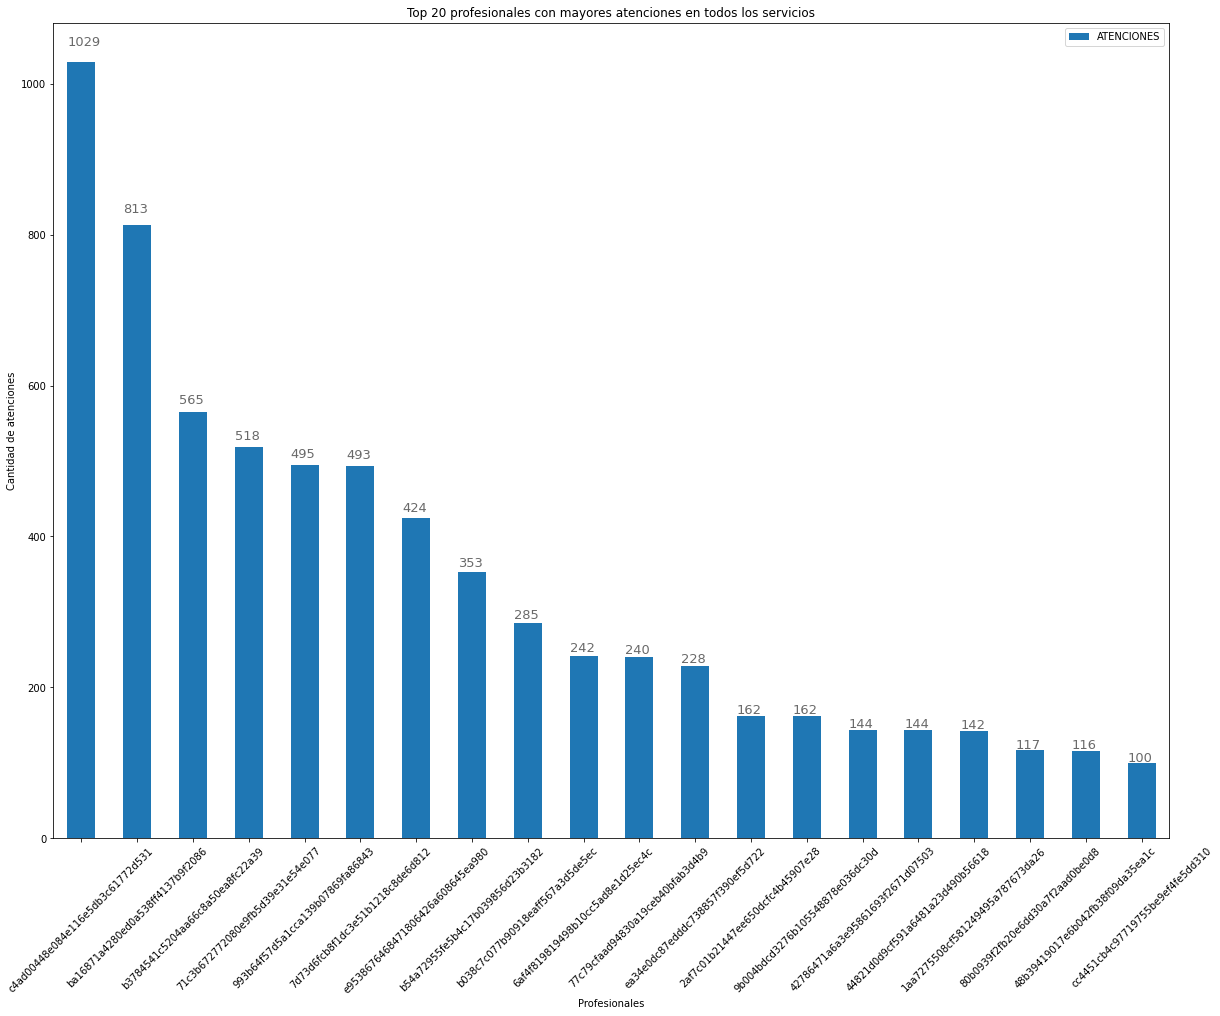

In [5]:
# Ejemplo:
from hmn_functions import top_20_professionals
top_20_professionals(hosp, por_seccion=False)

### atenciones
Imprime una tabla y/o un gráfico de torta de las atenciones del dataframe en el período del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_hosp`, y luego
  * atenciones_hosp(dataframe)


Atenciones en Tocoginecología | HOSPITALIZACIÓN (Total = 7617)


,ATENCIONES,% TOTAL
Tocoginecología,7568,99.36
UTIA,49,0.64




Atenciones en Neonatología | HOSPITALIZACIÓN (Total = 2385)


,ATENCIONES,% TOTAL
UCIN,876,36.73
UTIN,872,36.56
UMN,602,25.24
Neonatologia,35,1.47


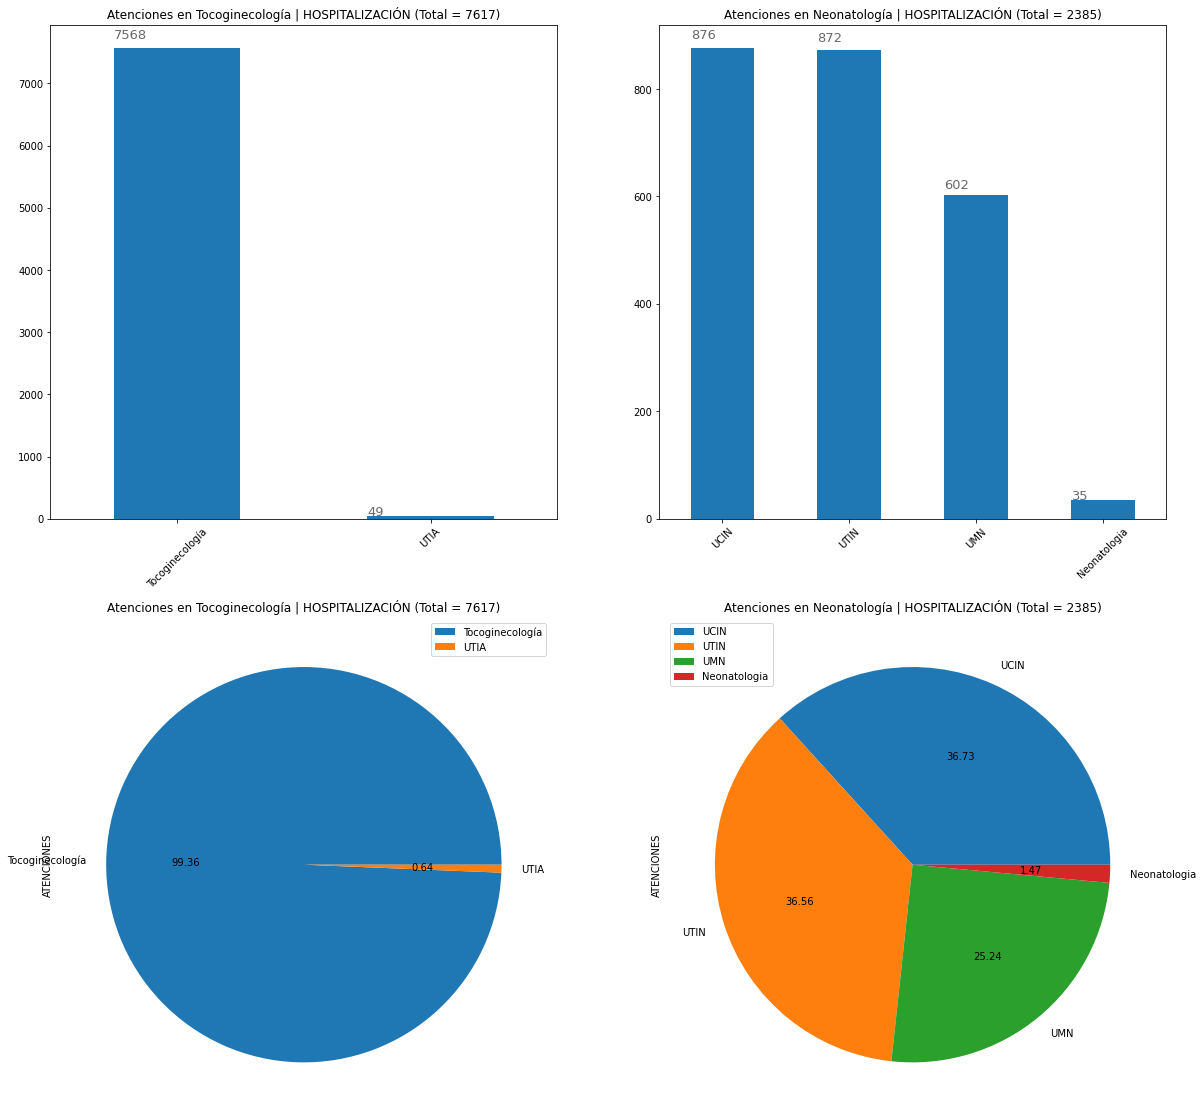

In [6]:
# Ejemplo:
from hmn_functions import atenciones_hosp
atenciones_hosp(hosp)

### atenciones_por_hora
Imprime un gráfico de barras de las atenciones en cada hora, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones en cada hora de cada sección en el período del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_hora_hosp`, y luego
  * atenciones_por_hora(dataframe)

Por defecto imprime el gráfico de barras **total**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`

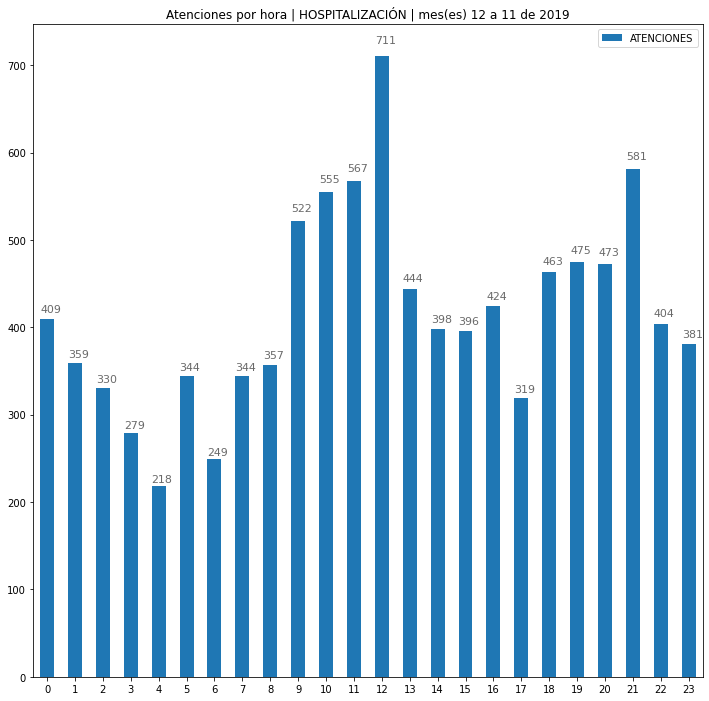

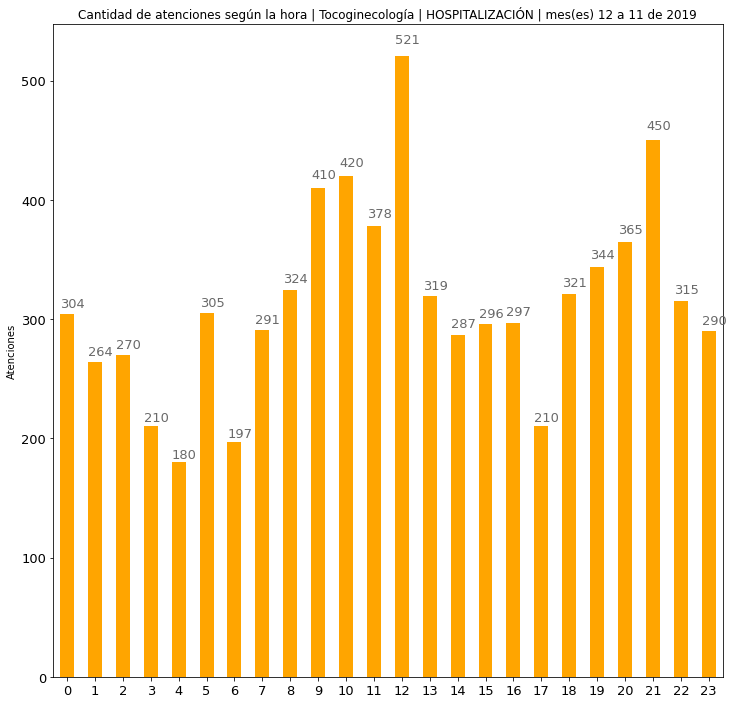

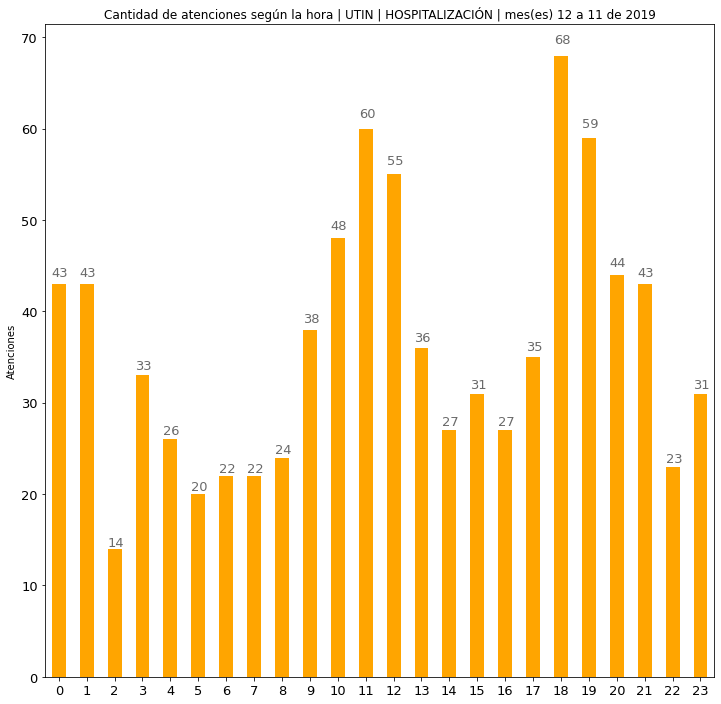

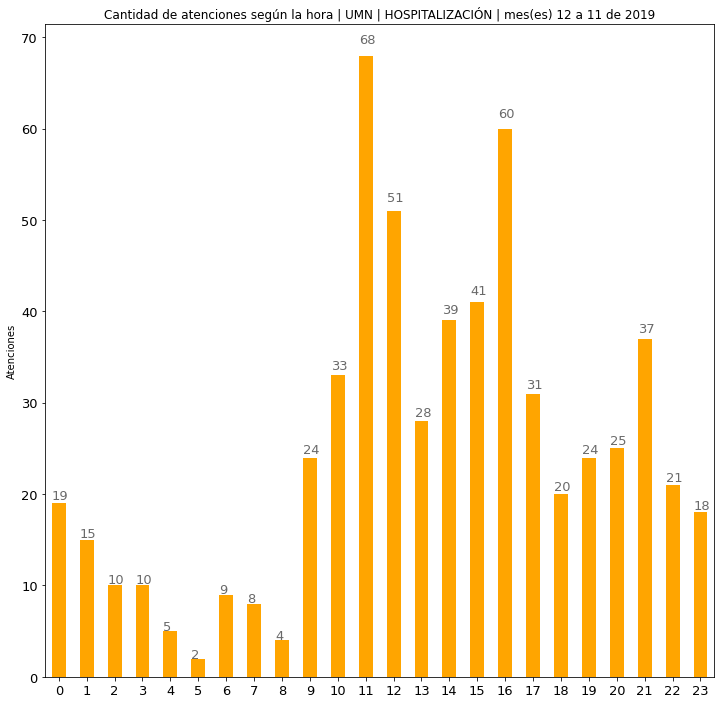

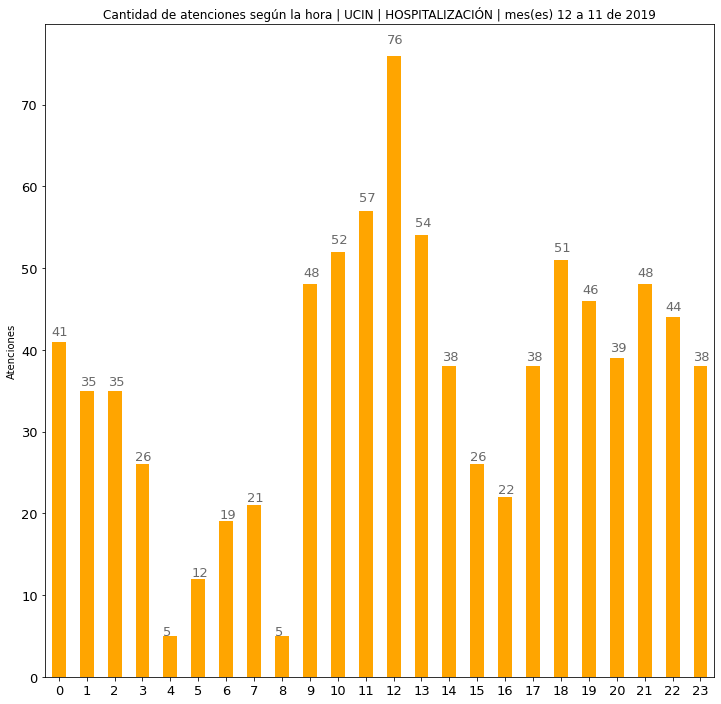

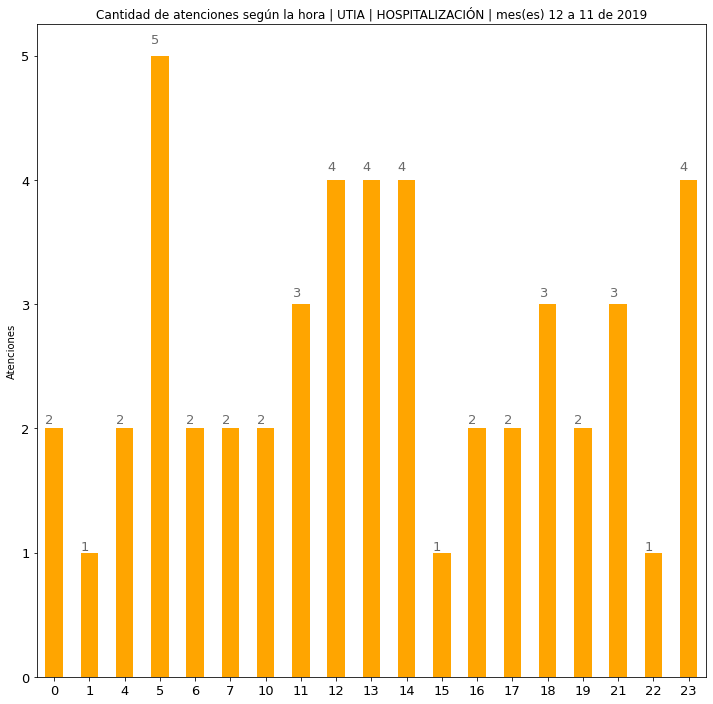

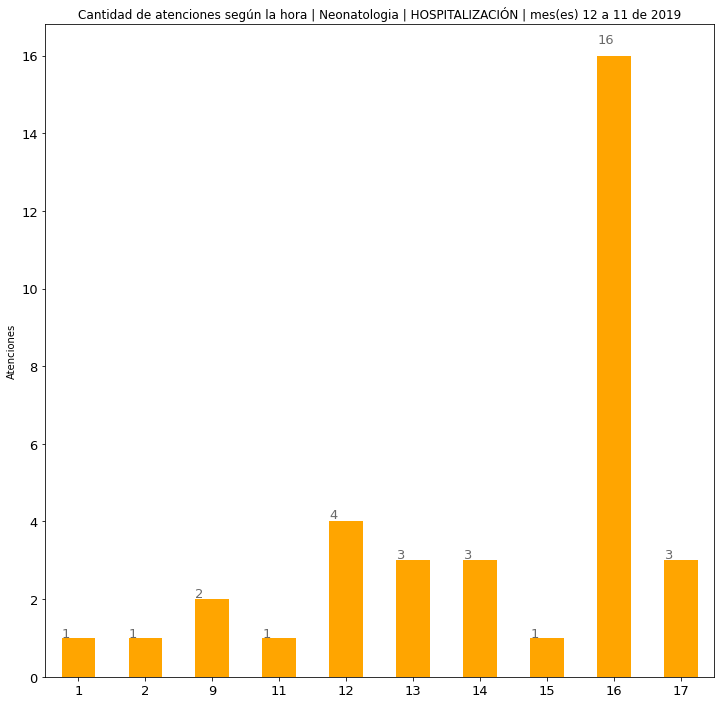

In [7]:
# Ejemplo:
from hmn_functions import atenciones_por_hora_hosp
atenciones_por_hora_hosp(hosp, por_servicio=True)

### atenciones_por_dia_semana
Imprime un gráfico de barras de las atenciones por día de la semana, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_dia_semana`, y luego
  * atenciones_por_dia_semana(dataframe)

Por defecto imprime el gráfico de barras **total**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`

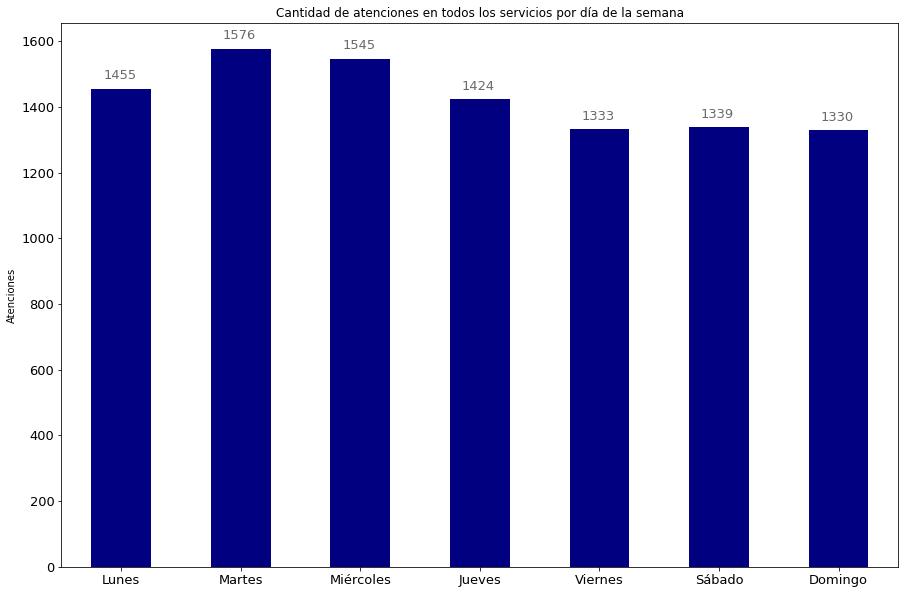

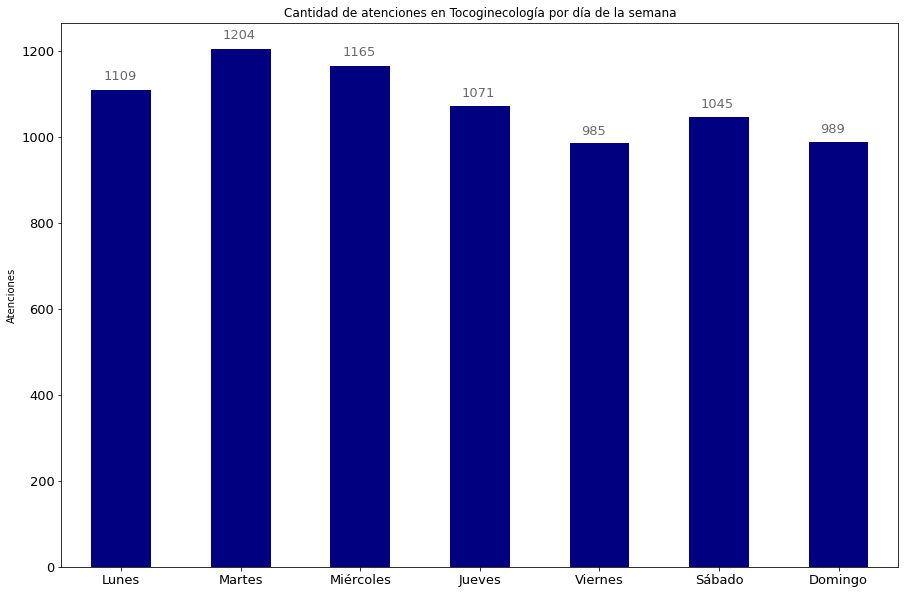

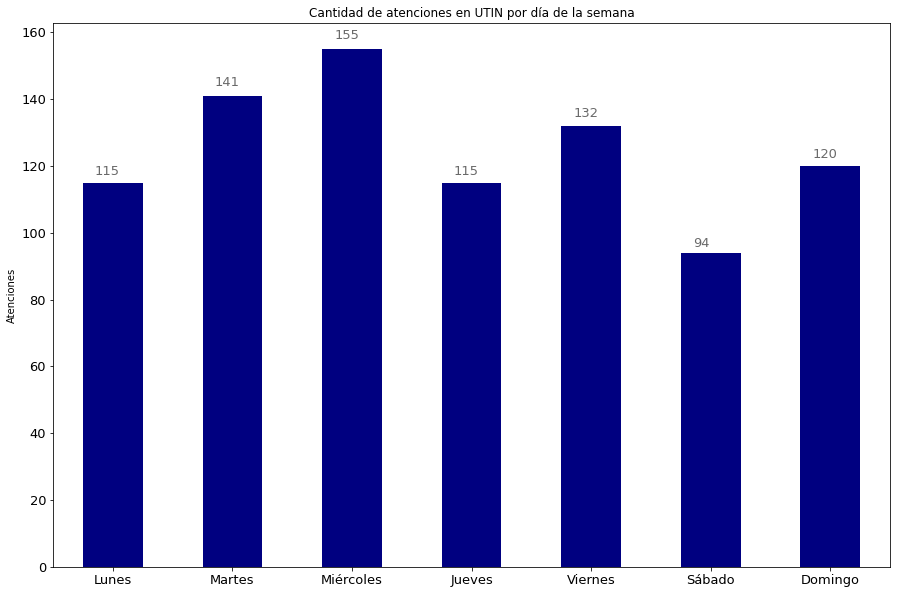

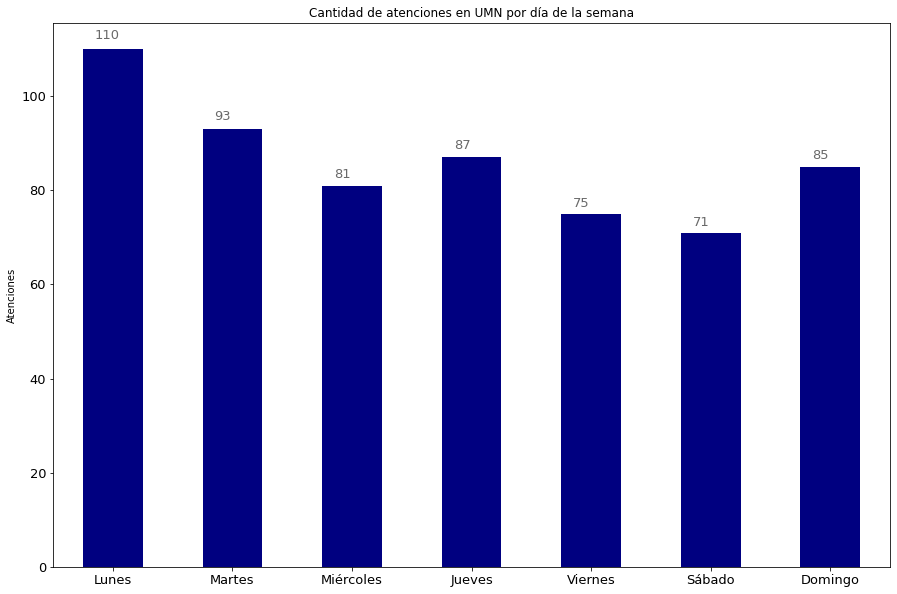

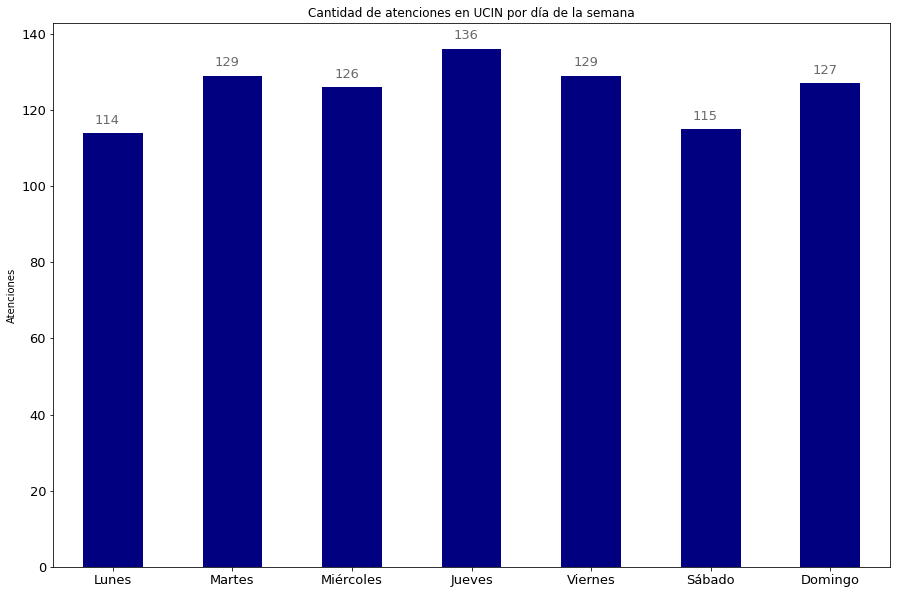

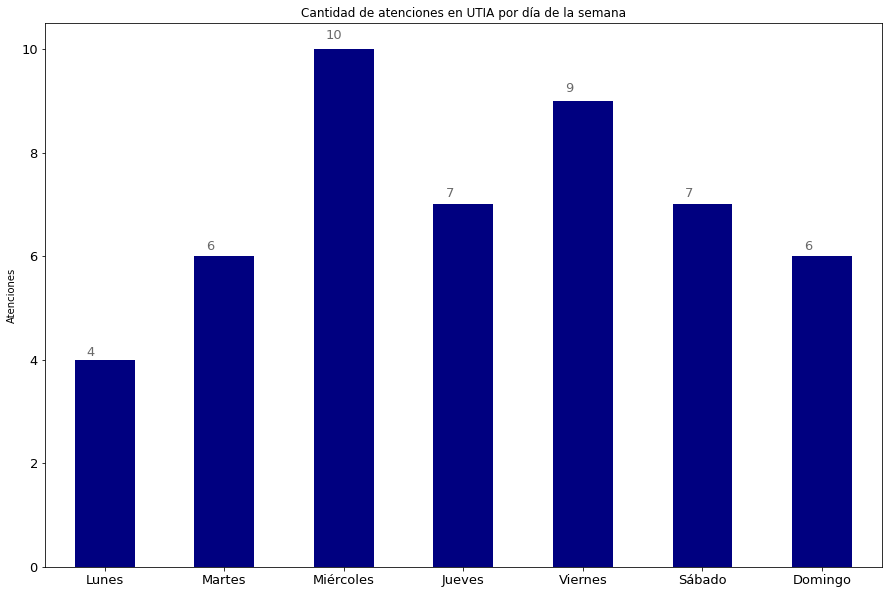

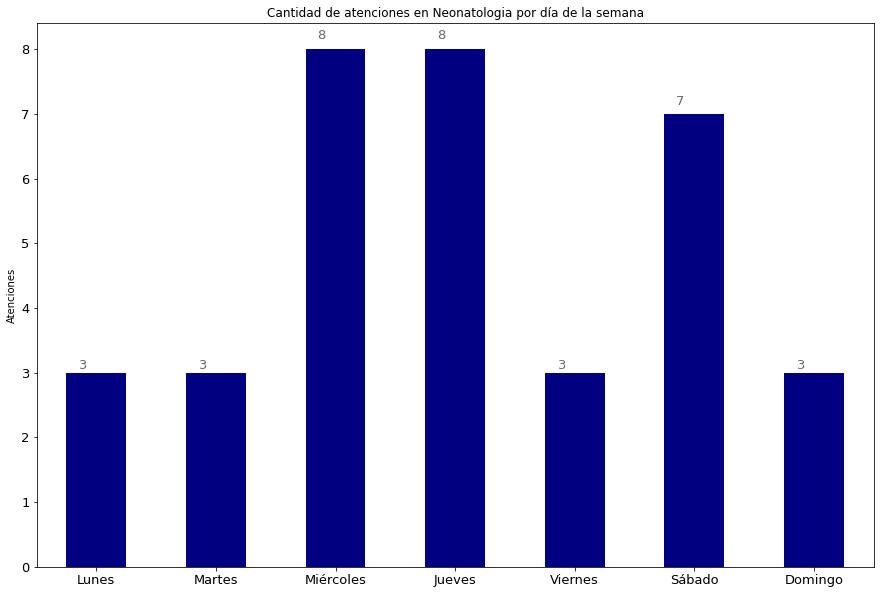

In [8]:
# Ejemplo:
from hmn_functions import atenciones_por_dia_semana
atenciones_por_dia_semana(hosp, por_seccion=True)

### atenciones_grupo_etareo
Imprime un gráfico de tortas de las atenciones por grupo etáreo, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado. 

Por conveniencia, las franjas etáreas se dividieron de la siguiente manera:

* 0 años,
* 1 a 13 años,
* 14 a 21 años,
* 22 a 40 años,
* 41 a 60 años,
* 61 ó más años.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import atenciones_grupo_etareo`, y luego
  * atenciones_grupo_etareo(dataframe)

Por defecto imprime el gráfico de barras **total**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`

<Figure size 432x288 with 0 Axes>

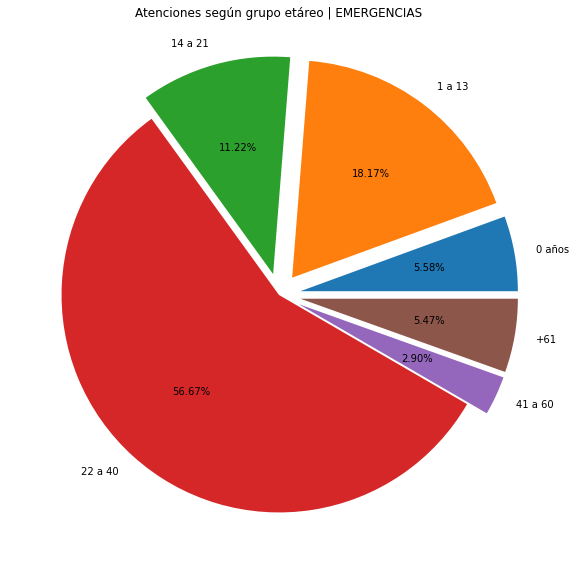

<Figure size 432x288 with 0 Axes>

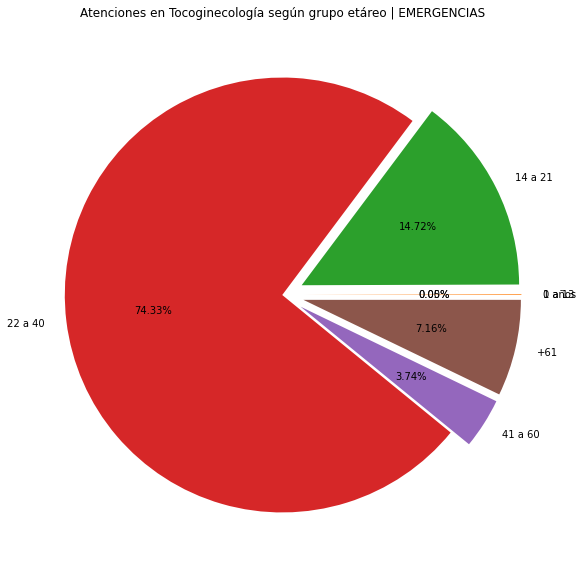

<Figure size 432x288 with 0 Axes>

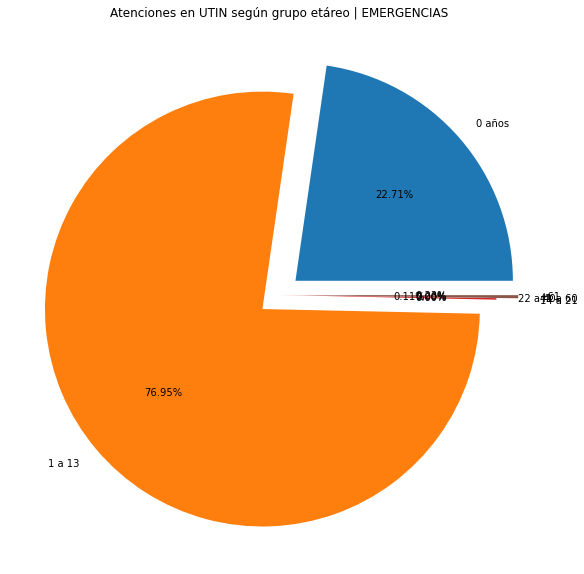

<Figure size 432x288 with 0 Axes>

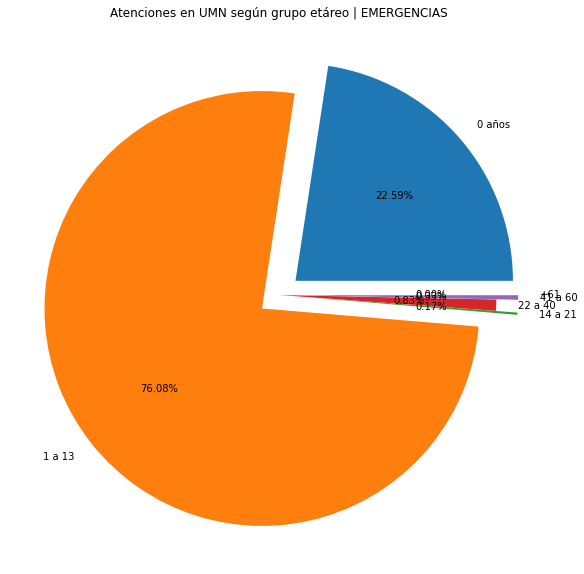

<Figure size 432x288 with 0 Axes>

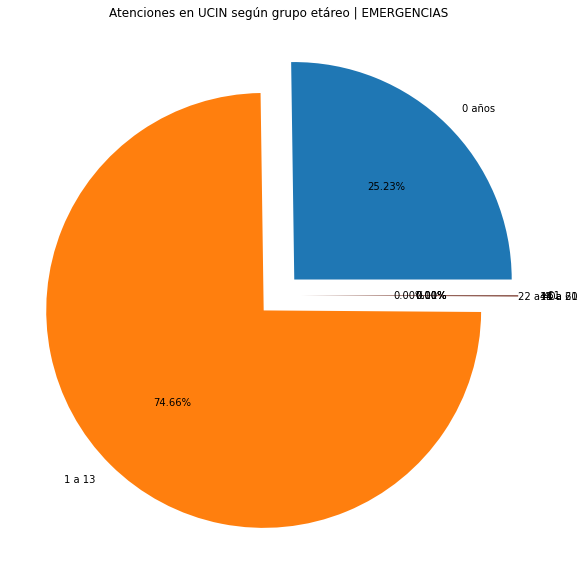

<Figure size 432x288 with 0 Axes>

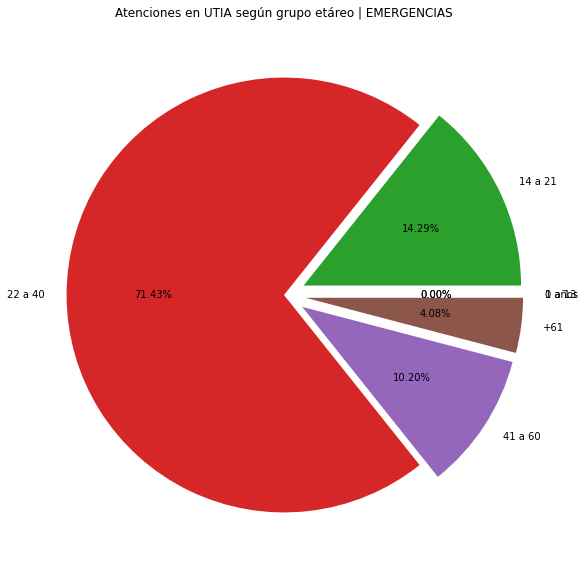

<Figure size 432x288 with 0 Axes>

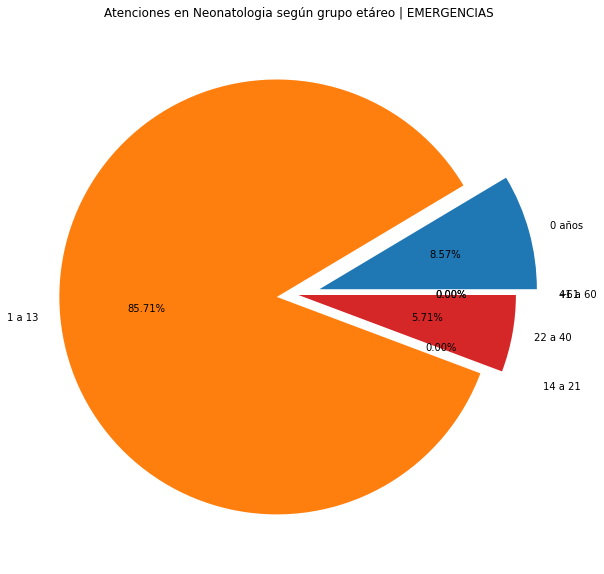

In [9]:
# Ejemplo:
from hmn_functions import atenciones_grupo_etareo
atenciones_grupo_etareo(hosp) # me falta corregir el título, dice EMERGENCIAS

### motivo_alta
Imprime una tabla y un gráfico de barras horizontal de los distintos motivos de alta, en el período del dataframe ingresado. Y luego un gráfico de barra de las atenciones por día de la semana de cada sección en el período del dataframe ingresado.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import motivo_alta`, y luego
  * motivo_alta(dataframe)

,MOTIVO_ALTA,CANTIDAD
0,Mejoría clínica,7510
1,Tratamiento médico,908
2,Otro motivo,889
3,Tratamiento quirúrgico,333
4,Retiro en contra de opinión médica,291
5,Defunción,71


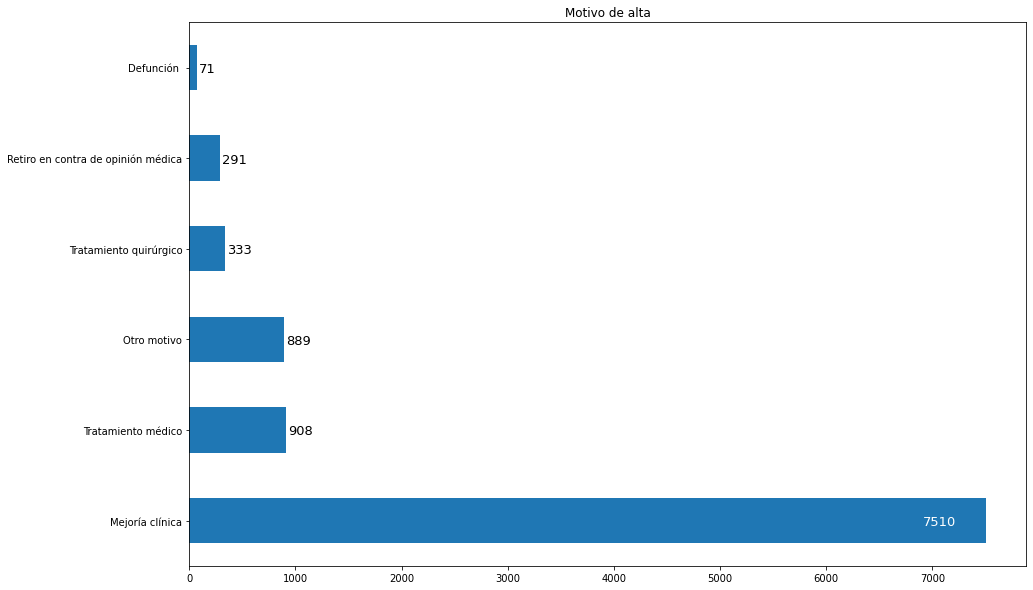

In [10]:
# Ejemplo:
from hmn_functions import motivo_alta
motivo_alta(hosp)

### top_20_cod_diagnostics
Imprime un gráfico de barras de los 20 diagnósticos más repetidos (codificados), en el período del dataframe ingresado. Y luego un gráfico de barra de los 20 diagnósticos más repetidos (codificados) por sección en el período del dataframe ingresado.

> 🔑 **Nota:** Si la sección tiene sólo diagnósticos sin codificar (figurarán con la leyenda 'nan', se graficarán sólo esos. De lo contrario los demás gráficos NO muestran los diagnósticos no codificados. 

Los totales figuran en el título del gráfico.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import top_20_cod_diagnostics`, y luego
  * top_20_cod_diagnostics(dataframe)

Por defecto imprime el gráfico de barras **total**. Para elegir criterios cuando se llama la función agregar las siguientes variables:
* `por_seccion = True` --> para incluir gráficos divididos por sección. De lo contrario, `por_seccion = False`


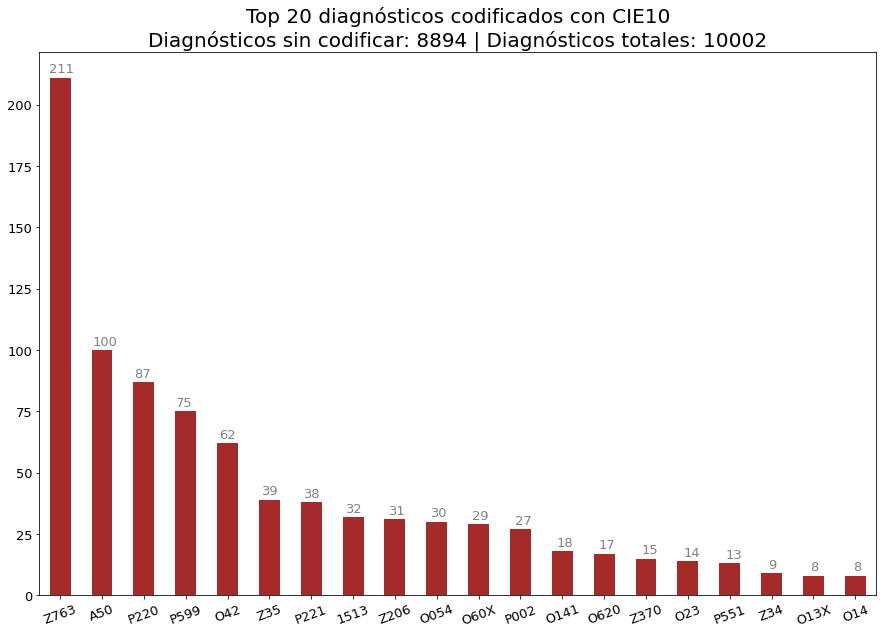

In [11]:
# Ejemplo:
from hmn_functions import top_20_cod_diagnostics
top_20_cod_diagnostics(hosp, por_seccion=False)

### promedios_tiempo

Muestra los promedios de tiempo entre:

* Ingreso y Alta Médica
* Alta Médica y Alta Administrativa
* Ingreso y Alta Administrativa (estadía total)

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import promedios_tiempo`, y luego
  * promedios_tiempo(dataframe)


In [12]:
# Ejemplo:
from hmn_functions import promedios_tiempo
promedios_tiempo(hosp)

Medias de tiempo según estado del paciente:
Entre Ingreso y Alta Médica: 6 days 06:13:22.549490102
Entre Alta Médica y Alta Administrativa: 0 days 06:30:43.563287342
Entre Ingreso y Alta Administrativa: 6 days 12:44:06.112777444

Medias de tiempo según estado del paciente en Tocoginecología:
Entre Ingreso y Alta Médica en Tocoginecología: 3 days 03:58:23.237315010
Entre Alta Médica y Alta Administrativa en Tocoginecología: 0 days 04:14:36.905391120
Entre Ingreso y Alta Administrativa en Tocoginecología: 3 days 08:13:00.142706131

Medias de tiempo según estado del paciente en UTIN:
Entre Ingreso y Alta Médica en UTIN: 30 days 17:19:06.743119266
Entre Alta Médica y Alta Administrativa en UTIN: 0 days 19:27:15.894495412
Entre Ingreso y Alta Administrativa en UTIN: 31 days 12:46:22.637614679

Medias de tiempo según estado del paciente en UMN:
Entre Ingreso y Alta Médica en UMN: 5 days 08:42:18.837209302
Entre Alta Médica y Alta Administrativa en UMN: 0 days 09:00:38.073089700
Entre Ingreso